In [59]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### &#10140; *Читання даних*</br>

In [60]:
trainData = pd.read_csv('./data/train.csv')

print('Data shape: ', trainData.shape)

Data shape:  (1460, 81)


#### &#10140; *EDA*</br>

In [61]:
trainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [62]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### -- `Лог-трансформація` -- 

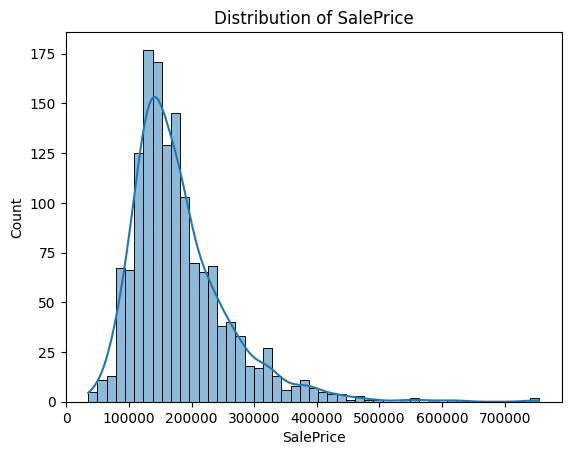

In [63]:
sns.histplot(trainData['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

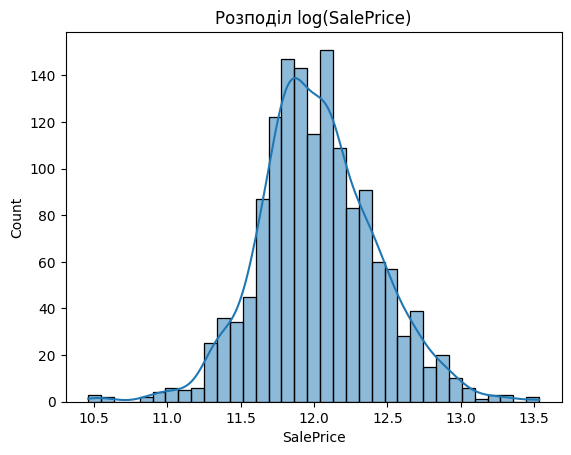

In [64]:
trainData['SalePrice'] = np.log1p(trainData['SalePrice'])
sns.histplot(trainData['SalePrice'], kde=True)
plt.title('Розподіл log(SalePrice)')
plt.show()

In [65]:
numeric_features = trainData.select_dtypes(include=["int64", "float64"])
skewed_features = numeric_features.apply(lambda x: x.skew())
skewed_features = skewed_features[skewed_features > 0.75].sort_values(ascending=False)
print(skewed_features)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
dtype: float64


In [66]:
trainData.drop(columns=['MiscVal'], inplace=True)
trainData.drop(columns=['Id'], inplace=True)
trainData['PoolArea'] = (trainData['PoolArea'] > 0).astype(int)
trainData['LotArea'] = np.log1p(trainData['LotArea'])  
trainData['3SsnPorch'] = (trainData['3SsnPorch'] > 0).astype(int) 
trainData.drop(columns=['LowQualFinSF'], inplace=True)
trainData['KitchenAbvGr'] = (trainData['KitchenAbvGr'] > 0).astype(int)
trainData['BsmtFinSF2'] = (trainData['BsmtFinSF2'] > 0).astype(int)
trainData['ScreenPorch'] = np.log1p(trainData['ScreenPorch'])  


In [67]:
numeric_features = trainData.select_dtypes(include=["int64", "float64"])
skewed_features = numeric_features.apply(lambda x: x.skew())
skewed_features = skewed_features[skewed_features > 0.75].sort_values(ascending=False)
print(skewed_features)

PoolArea         14.352680
3SsnPorch         7.613746
BsmtHalfBath      4.103403
ScreenPorch       3.150409
EnclosedPorch     3.089872
MasVnrArea        2.669084
BsmtFinSF2        2.425646
OpenPorchSF       2.364342
LotFrontage       2.163569
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
dtype: float64


**MiscVal** ✅
</br> **PoolArea** ✅
</br> **LotArea** ✅
</br> **3SsnPorch** ✅
</br> **LowQualFinSF** ✅
</br> **KitchenAbvGr** ✅
</br> **BsmtFinSF2** ✅
</br> **ScreenPorch** ✅

In [ ]:
x = trainData['ScreenPorch']

print((x < 0).sum())  # чи є від’ємні
print((x == 0).sum(), '\n') # чи багато нулів

print(trainData[['ScreenPorch', 'SalePrice']].corr())
print(np.log1p(trainData[['ScreenPorch', 'SalePrice']]).corr())

x.sort_values(ascending=True).head(20)

0
1344 



0       0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
30      0.0
15      0.0
16      0.0
1441    0.0
1442    0.0
1397    0.0
Name: ScreenPorch, dtype: float64

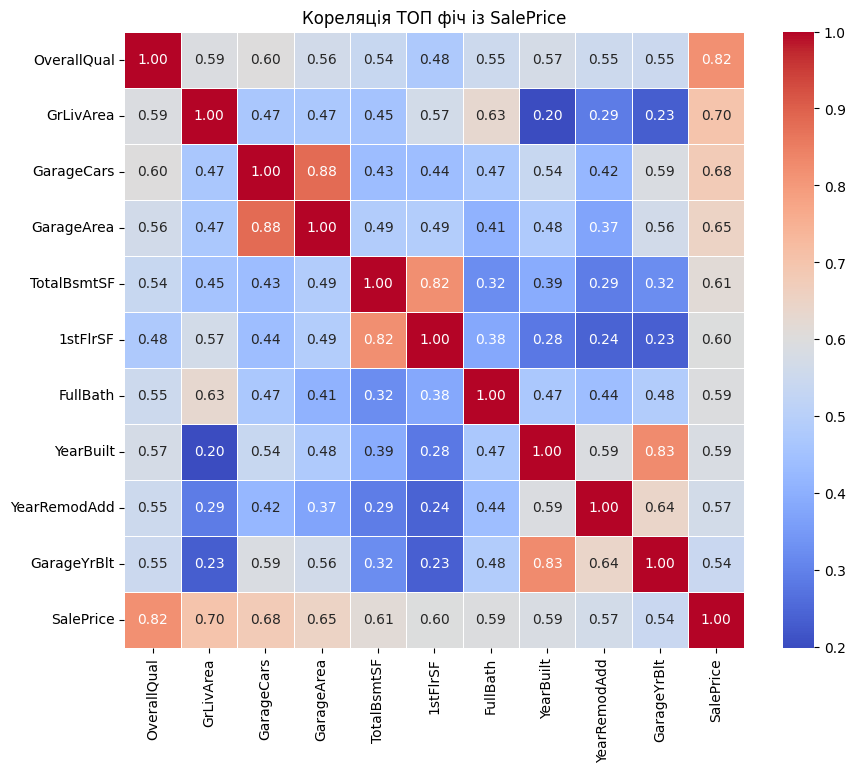

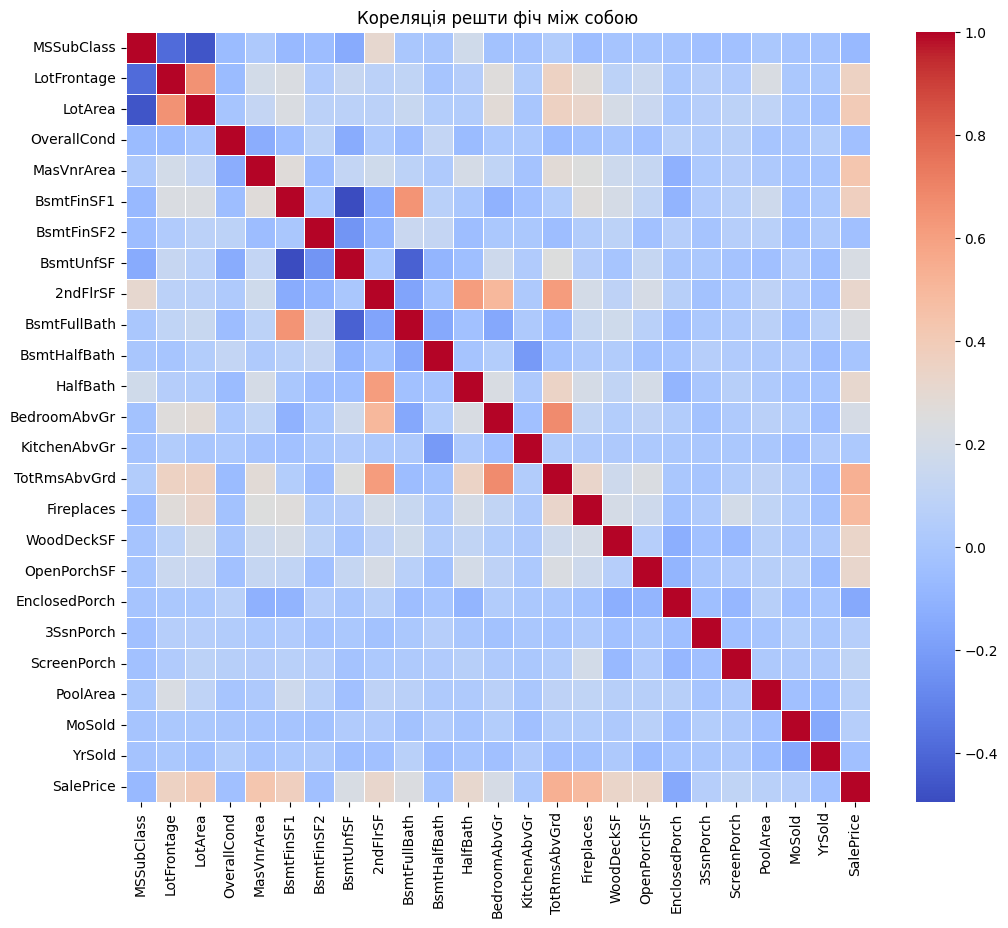

In [69]:
corr_matrix = trainData.corr(numeric_only=True)
N = 10  # кількість топ-фіч
top_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False)[1:N+1].index.tolist()
other_features = [col for col in corr_matrix.columns if col not in top_features and col != 'SalePrice']

plt.figure(figsize=(10, 8))
sns.heatmap(trainData[top_features + ['SalePrice']].corr(numeric_only=True), 
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Кореляція ТОП фіч із SalePrice")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(trainData[other_features + ['SalePrice']].corr(numeric_only=True), 
            annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Кореляція решти фіч між собою")
plt.show()
